# Predicting Titanic Survivors Using K-Means Clustering

The following project will examine Titanic passenger data.

The training data set contains several records about the passengers of Titanic. It has 12 features capturing information about 'passenger_class', 'port_of_Embarkation', 'passenger_fare' etc. The dataset's label is 'survival' which denotes the survivial status of a particular passenger. We will cluster the records into two i.e. the ones who survived and the ones who did not.

## Introduction To The Dataset

In [120]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
# import the datasets (training and test) direct from Kaggle
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [122]:
# preview training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
# number of columns and rows in training set
train.shape

(891, 12)

In [124]:
# preview test dataset (which doesn't include the 'survived' column)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
# number of columns and rows in test set
test.shape

(418, 11)

In [126]:
# explore some initial statistics on the training dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
# explore some initial statistics on the test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [128]:
# list the feature names
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [129]:
# not all machine learning algorithms support missing values. K-Means is one of them. 
# so we need to handle the missing values present. We will first see where are the values missing:

# for the training set
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [130]:
# for the test set
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [131]:
# show number of missing values for training set
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [132]:
# show number of missing values for test set
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In the training set, the columns Age, Cabin and Embarked have missing values.
In the test set, the Age and Cabin columns have missing values.

Options to handle missing values:
- remove rows with missing values
- impute missing values - preferable because if you remove the rows with missing values it can cause insufficiency in the data whichresults in inefficient training of the model

Options for imputation:
- a constant value that has meaning within the domain, such as 0, distinct from all other values
- a value from another randomly selected record
- a mean, median or mode value for the column
- a value estimated by another machine learning model

Any imputation on the train set will have to be performed on test data when predictions are made.

We will provide a Mean Imputation.

In [133]:
# fill missing values with mean column values in train set
train.fillna(train.mean(), inplace=True)

In [134]:
# fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

In [135]:
# check the missing values have been fixed 
print(train.isna().sum())
print()
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


There are still some missing values in the Cabin and Embarked columns. This is because the values are non-numeric. In order to perform the imputation, the values need to be numeric. We should find out which features are categorical and numerical

- Categorical: Survived, Sex, Embarked
- Ordinal: Pclass
- Continuous: Age, Fare 
- Discrete: SibSp, Parch

Two features left out which are not listed above; Ticket and Cabin. 
- Ticket is a mix of numeric and alphanumeric data types. 
- Cabin is alphanumeric. 

Let's look at some sample values

In [136]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [137]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

We will look at survival count of passengers with respect to:
- Pclass
- Sex
- SibSp
- Parch

In [138]:
# survival count with with respect to Pclass - first selecting two columns on their own
train[['Pclass', 'Survived']].head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [139]:
# survival count with respect to Pclass - now grouping by one column, taking a mean, and sorting them
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [140]:
# survival count with respect to Sex:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


We can see the survival rate of female passengers is significantly higher for males

In [141]:
# survival count with respect to SibSp
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [142]:
# survival count with respect to Parch
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


We will perform some quick plotting. First, plot the graph of "Age vs. Survived"

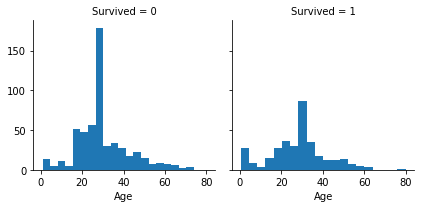

In [143]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

We will create the same graphs (Age vs Survived), but add another dimension (Pclass) to the graph

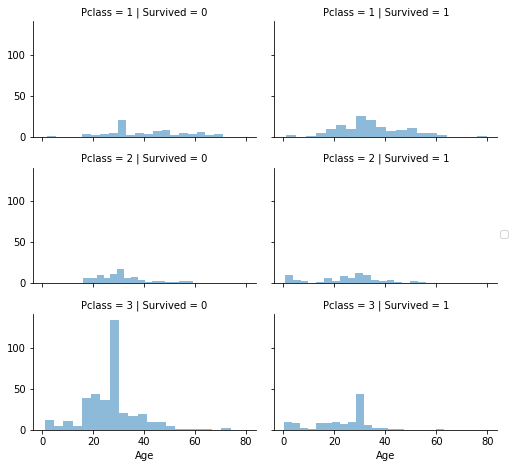

In [144]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Before we build a K-Means model with the training set, we need to do some data preprocessing as well. 

We can see that not all the feature values are the same type. Some are numerical and some are not. To ease the computation, you will feed all numerical data to the model. 

We will look at the data types of the different features we have:

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see the following features are non-numeric:

- Name
- Sex
- Ticket
- Cabin
- Embarked

Before converting them into numeric, we could do some feature engineering i.e. features like Name, Ticket, Cabin and Embarked do not have any impact on the survival status. 

It's usually better to train your model with only significant features, than to train with all the features (or unnecessary ones). This means the training of the model can happen in much lesser time. 

Name, Ticket, Cabin and Embarked can be dropped, as they will not have significant impact on the training of the model.

In [146]:
# drop the columns
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

We will now convert the remaining non numeric feature 'Sex' feature to a numerical one, using a technique called Label Encoding

In [147]:
# check the current values
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [148]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [149]:
# check the new values (converted to 1s and 0s)
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [150]:
# confirm whether there are any non numeric columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [151]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


We can now train your K-Means model now.

In [108]:
# create an array of training values (minus the survived column) and call 'X'
X = np.array(train.drop(['Survived'], 1).astype(float))

In [109]:
X[0:10]

array([[ 1.        ,  3.        ,  1.        , 22.        ,  1.        ,
         0.        ,  7.25      ],
       [ 2.        ,  1.        ,  0.        , 38.        ,  1.        ,
         0.        , 71.2833    ],
       [ 3.        ,  3.        ,  0.        , 26.        ,  0.        ,
         0.        ,  7.925     ],
       [ 4.        ,  1.        ,  0.        , 35.        ,  1.        ,
         0.        , 53.1       ],
       [ 5.        ,  3.        ,  1.        , 35.        ,  0.        ,
         0.        ,  8.05      ],
       [ 6.        ,  3.        ,  1.        , 29.69911765,  0.        ,
         0.        ,  8.4583    ],
       [ 7.        ,  1.        ,  1.        , 54.        ,  0.        ,
         0.        , 51.8625    ],
       [ 8.        ,  3.        ,  1.        ,  2.        ,  3.        ,
         1.        , 21.075     ],
       [ 9.        ,  3.        ,  0.        , 27.        ,  0.        ,
         2.        , 11.1333    ],
       [10.        ,  2.    

In [110]:
# create an array of the 'survived' training value and call 'y'
y = np.array(train['Survived'])

In [111]:
# check first 10 values
y[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [112]:
# build the K-Means model by fitting the training array (X) to it
# cluster the passenger records into 2: Survived or Not survived
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

We will see how well the model is doing by looking at the percentage of passenger records clustered correctly

In [113]:
correct = 0
for i in range(len(X)):   # 891 records
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))     # essentially turns each array record dimension (7,) into (1,7)
    prediction = kmeans.predict(predict_me)         # runs through each record, and predicts what cluster (0 or 1) it should be
    if prediction[0] == y[i]:                       # check each prediction value (either 0 or 1) maps to actual survival value
        correct += 1

print(correct/len(X))

0.49158249158249157


The model can cluster correctly with a 50% accuracy. To enhance the performance of the model, we can tweak some parameters:
- algorithm
- max_iter
- n_jobs 

In [114]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [115]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


This doesn't effect the score. One of the reasons might be we haven't scaled the values of the different features.  

The features in the dataset contain different ranges of values, so a small small change in a feature does not affect the other feature. Therefore, it's important to scale the values of the features to a same range.

We will make 0 - 1 as the uniform value range across all the features.

In [116]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
X_scaled

array([[0.        , 1.        , 1.        , ..., 0.125     , 0.        ,
        0.01415106],
       [0.0011236 , 0.        , 0.        , ..., 0.125     , 0.        ,
        0.13913574],
       [0.00224719, 1.        , 0.        , ..., 0.        , 0.        ,
        0.01546857],
       ...,
       [0.99775281, 1.        , 0.        , ..., 0.125     , 0.33333333,
        0.04577135],
       [0.9988764 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.01512699]])

In [118]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [119]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263


We can see an 12% increase in the score.

This model is clustering each training row into a cluster (0 or 1), which, given each feature has a correlation with the survival status, should broadly indicate whether that passenger survived or not.

In this project, we loaded some data, preprocessed, performed some feature engineering, and created and ran a K-Means model

However, the biggest disadvantage is that K-Means requires you to pre-specify the number of clusters (k). With the Titanic dataset, we had domain knowledge that told us the number of people who survived. This might not be the case with real world datasets. Also, it is sensitive to outliers, and different results can occur if you change the ordering of the data.